## Model 1:  

### Description
Discrete time difference equation for a cicada population with emergences having periodicity $p$.  
In the model the extinction or stabilization of the cicada population is determined by the balance of
- predation of nymphs between emergences,
- the predation of adults during emergences, and
- the fecundity of emergent adults.  

### Main ideas

The main ideas of the model, in terms of $p$, are as follows:

(I) Predation of nymphs is a monotonically increasing function of $p$ due to compounded annual losses between emergences.  
=> OK, data?

(II)Predation during emergences is a monotonically decreasing function of $p$ due to lessening significance to predators as $p$ increases.  
 => OK, data?

(III) Predation during emergences depends on $j$ cycling predator populations, $j=2;3$ (for simplicity, highervalues of $j$ are not included).  
$\quad$ When $j$ divides a multiple of $p$, there is an increased mortality due to the presence of jcycling predators.

=> Ok, data backing values of $j$? Try other values of $j$.

(IV) The per capita capacity to produce and establish eggs of emerged cicadas which survive predation is independent of $p$  
=> Ok, data?

### Assumptions
(A.1) The survival fraction of nymphsis constant each year. Thus, $m_0(t) = c_0$, where  $0 < c_0 < 1$.  
It is assumed that during emergence years the cicada species also exists mainly as nymphs, which have the same survival probability as in non-emergence years).  
=> Maybe true because emergence happens in only a few weeks.  
=> An extension of the model describing more precisly the population during emergence can be considered: There's a period of 2 months with no nymphs. \ref [6] \figure 1.

==> What about underground predators? m_j is only about emergence years!

In [72]:
import math
import matplotlib.pyplot as plt
import numpy as np
import copy

In [73]:
class Model1:
    def __init__(self, p, c0, c1, r, cycling_predators, a0): 
        """
            c0: survival fraction of nymphs
            
            cycling_predators = {cycle_length: (b, c)}
        """
        self.p = p
        self.c0 = c0
        self.c1 = c1
        self.r = r
        self.cycling_predators = cycling_predators
        self.a0 = a0

    def m0(self, N, t):
        return self.c0
    
    def m1(self, N, t):
        if (t % self.p) == 0:
            return math.exp(-self.r*N)*(self.p/(self.c1 + self.p))
        else:
            return 1

    def mj(self, N, t):
        prod = 1

        for year, (b, c) in self.cycling_predators.items():
            if (t % self.p) == 0:
                if self.p % year == 0:
                    prod *= b
                else:
                    prod *= c
            else:
                prod *= 1

        return prod


    def f(self, t):
        if (t % self.p) == 0:
            return self.a0
        else:
            return 1


    def F(self, N, t):
        return self.m0(N, t)*self.m1(N, t)*self.mj(N, t)*self.f(t)

    def simulate(self, tmax):
        Nt = 1
        N = [Nt]

        for t in range(1, tmax):
            Nt = self.F(Nt, t)*Nt
            N.append(Nt)

        return N

In [74]:
DEFAULT_PARAMS = {
    'c0': 0.97,
    'c1':  12,
    'r': .007,
    'cycling_predators': {
        2: (.96, .98),
        3: (.96, .98),
    },
    'a0': 3
}

PARAMS_11_19 = {
    'c0': 0.97,
    'c1':  12,
    'r': .007,
    'cycling_predators': {
        2: (.95, 0.99),
        3: (.95, 0.99),
    },
    'a0': 3
}

PARAMS_no_influence_of_cycling_pred = {
    'c0': 0.97,
    'c1':  12,
    'r': .007,
    'cycling_predators': {
        2: (.98, 0.98),
        3: (.98, 0.98),
    },
    'a0': 3
}

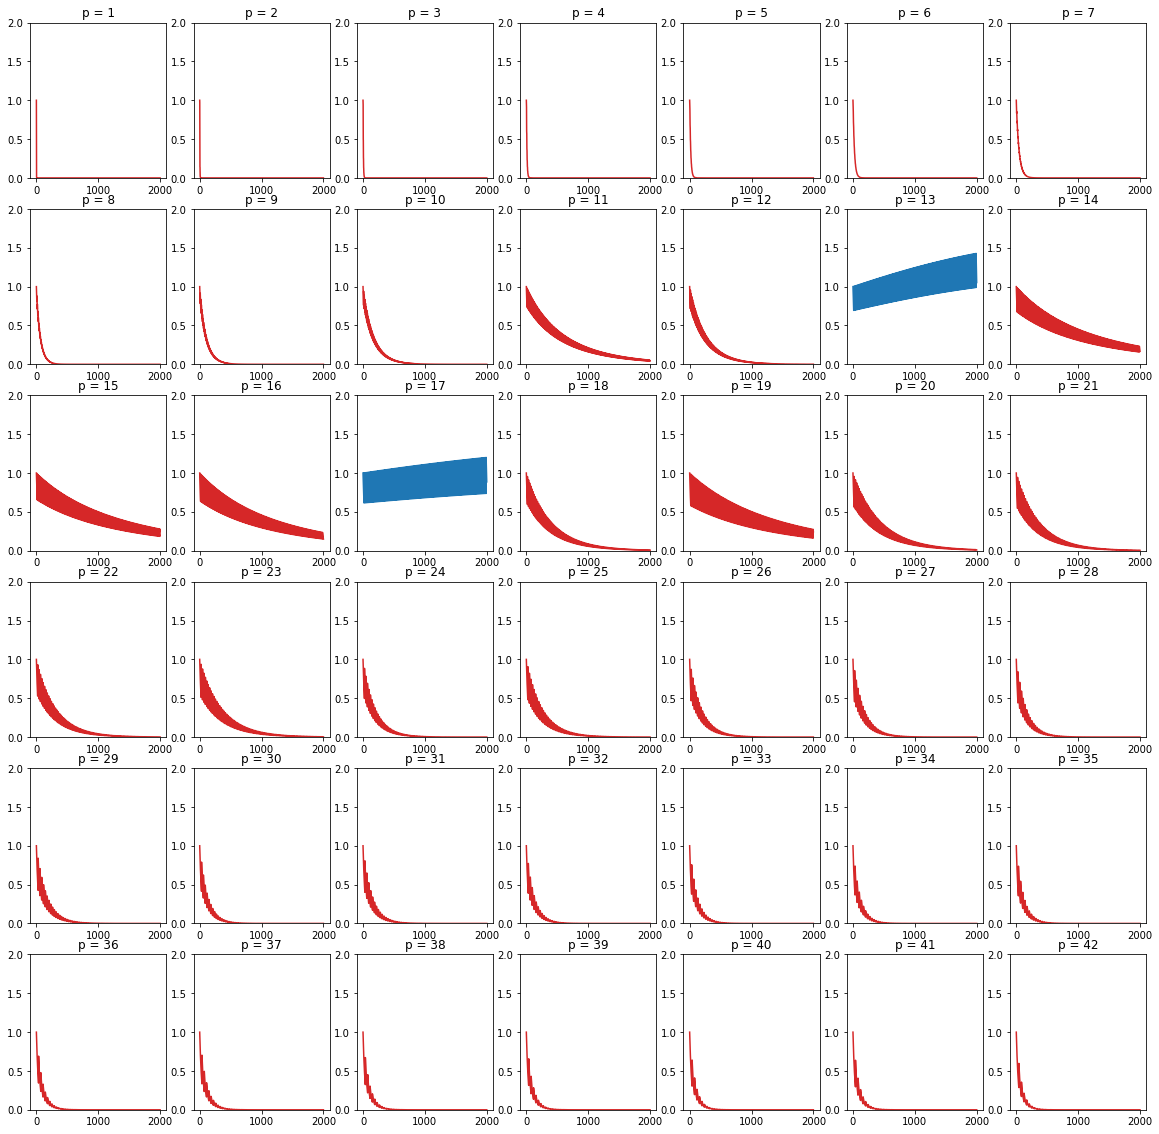

In [75]:
PARAMS = {
    'c0': 0.97,
    'c1':  12,
    'r': .007,
    'cycling_predators': {
        2: (.96, .98),
        3: (.96, .98),
    },
    'a0': 3
}
tmax = 2000
c0, c1, r, cycling_predators, a0 = PARAMS.values()

plt.figure(figsize=(20,20))
for i, p in enumerate(range(1, 43)):
    model = Model1(p, c0, c1, r, cycling_predators, a0)
    N = model.simulate(tmax)
    plt.subplot(6,7,i+1)
    plt.title(f"p = {p}")
    survives = max(N[4*tmax//5:]) > 1
    color = 'C0' if survives else 'C3'
    plt.plot(np.arange(tmax), N, color=color)
    plt.ylim([0, 2])

### Testing $m_0$

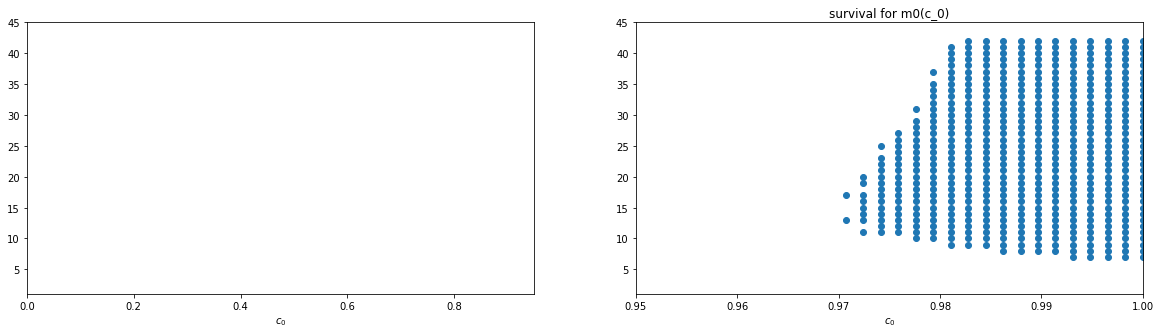

In [62]:
def test_c0(DEFAULT_PARAMS):
    
    c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
    
    plt.figure(figsize=(20,5))
    
    for i, c0_values in enumerate([np.linspace(0, 0.95, 10), np.linspace(0.95, 1, 30)]):
        plt.subplot(1,2,i+1)
        for c0 in c0_values:
            survives = []
            for p in range(1, 43):
                model = Model1(p, c0, c1, r, cycling_predators, a0)
                N = model.simulate(tmax)
                if max(N[4*tmax//5:]) > 1: survives.append(p)

            plt.plot([c0]*len(survives), survives, 'oC0')
        
        plt.xlim([c0_values[0], c0_values[-1]])
        plt.ylim([1,45])
        plt.xlabel('$c_0$')
    plt.title("survival for m0(c_0)")
        
test_c0(DEFAULT_PARAMS)

### Testing $m_1$

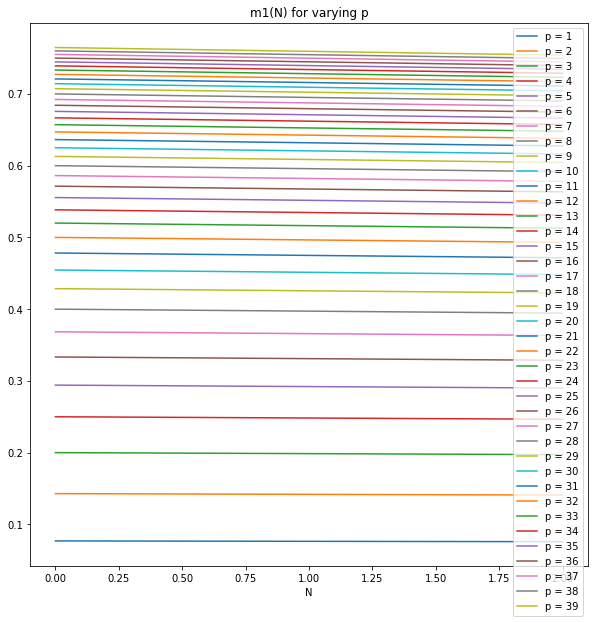

In [59]:
def plot_m1():
    r = .007
    c1 = 12
    
    plt.figure(figsize=(10,10))
    for i, p in enumerate(range(1, 40)):
        N = np.linspace(0,2,100)
        m1 = np.exp(-r*N)*(p/(c1 + p))
        plt.plot(N, m1, label=f"p = {p}")
        plt.xlabel('N')
        plt.legend()
        plt.title("m1(N) for varying p")
#         plt.ylim([0, 2])

plot_m1()

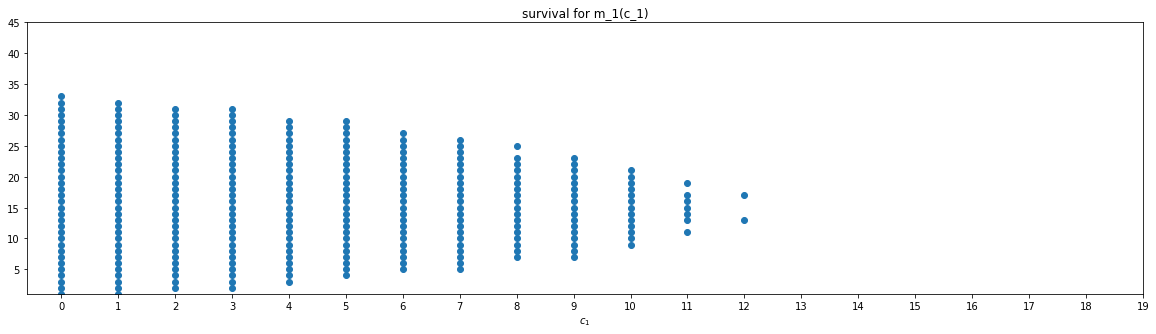

In [63]:
def test_c1(DEFAULT_PARAMS):
    
    c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
    
    plt.figure(figsize=(20,5))

    c1_values = np.arange(0,20)
    for c1 in c1_values:
        survives = []
        for p in range(1, 43):
            model = Model1(p, c0, c1, r, cycling_predators, a0)
            N = model.simulate(tmax)
            if max(N[4*tmax//5:]) > 1: survives.append(p)

        plt.plot([c1]*len(survives), survives, 'oC0')

    plt.xticks(c1_values)
    plt.ylim([1,45])
    plt.xlabel('$c_1$')
    plt.title("survival for m_1(c_1)")
test_c1(DEFAULT_PARAMS)

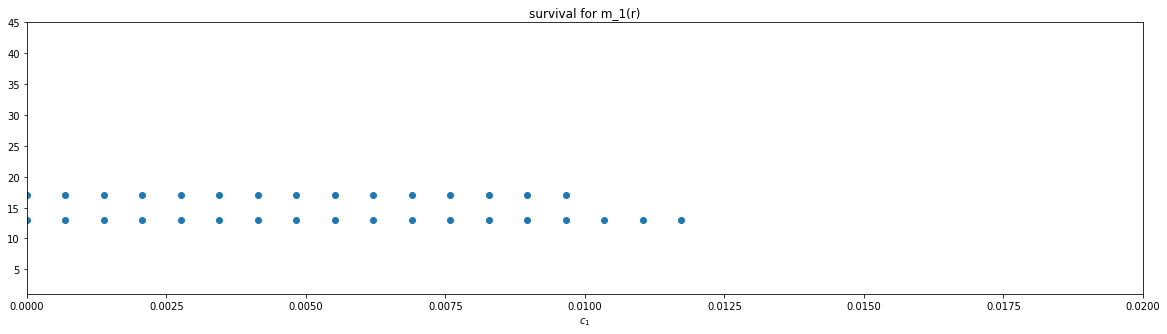

In [64]:
def test_r(DEFAULT_PARAMS):
    
    c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
    
    plt.figure(figsize=(20,5))

    r_values = np.linspace(0, .020, 30)
    for r in r_values:
        survives = []
        for p in range(1, 43):
            model = Model1(p, c0, c1, r, cycling_predators, a0)
            N = model.simulate(tmax)
            if max(N[4*tmax//5:]) > 1: survives.append(p)

        plt.plot([r]*len(survives), survives, 'oC0')

    plt.xlim([r_values[0], r_values[-1]])
    plt.ylim([1,45])
    plt.xlabel('$c_1$')
    plt.title("survival for m_1(r)")
        
test_r(DEFAULT_PARAMS)

### Cycling predators
1 - number of predators

2 - values of predation for j = 2, 3

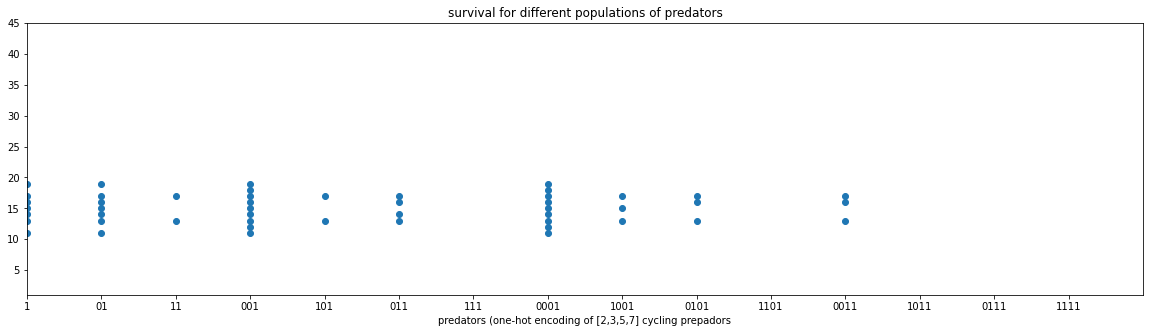

In [67]:
def generate_cycling_predators(encoding):
    
    predators = [
        (2, (.96, .98)),
        (3, (.96, .98)),
        (5, (.96, .98)),
        (7, (.96, .98)),
    ]
    
    cycling_predators = {}
    one_hot_encoding = "{0:b}".format(encoding)
    for i, e in enumerate(one_hot_encoding[::-1]):
        if e == '1': 
            cycling_predators[predators[i][0]] = predators[i][1]
    
    return cycling_predators



def test_cycling_predators(DEFAULT_PARAMS):
    
    c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
    
    plt.figure(figsize=(20,5))

    for i in range(1, 16):
        survives = []
        for p in range(1, 43):
            cycling_predators = generate_cycling_predators(i)
            model = Model1(p, c0, c1, r, cycling_predators, a0)
            N = model.simulate(tmax)
            if max(N[4*tmax//5:]) > 1: survives.append(p)

        plt.plot([i]*len(survives), survives, 'oC0')

    plt.xlim([1, 16])
    plt.xticks(np.arange(1, 16), ["{0:b}".format(i)[::-1] for i in range(1,16)])
    plt.ylim([1,45])
    plt.xlabel('predators (one-hot encoding of [2,3,5,7] cycling prepadors')
    plt.title("survival for different populations of predators")
        
test_cycling_predators(DEFAULT_PARAMS)

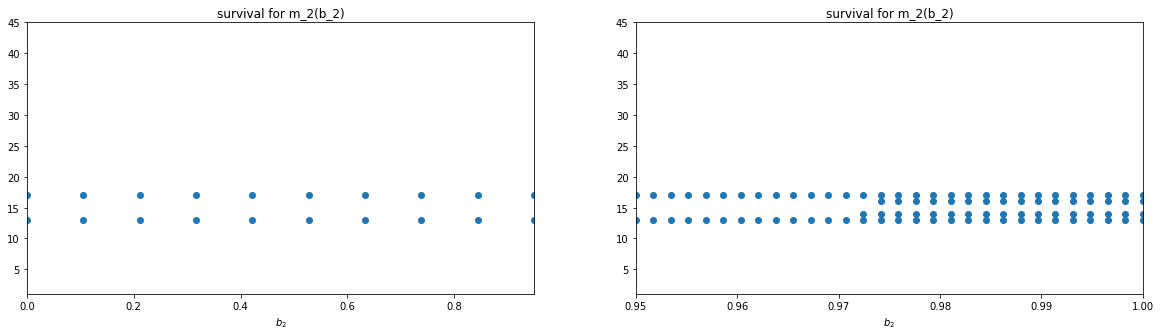

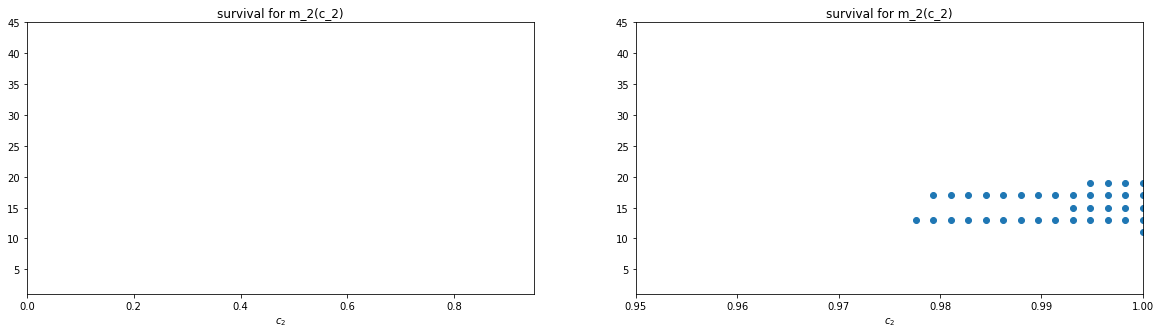

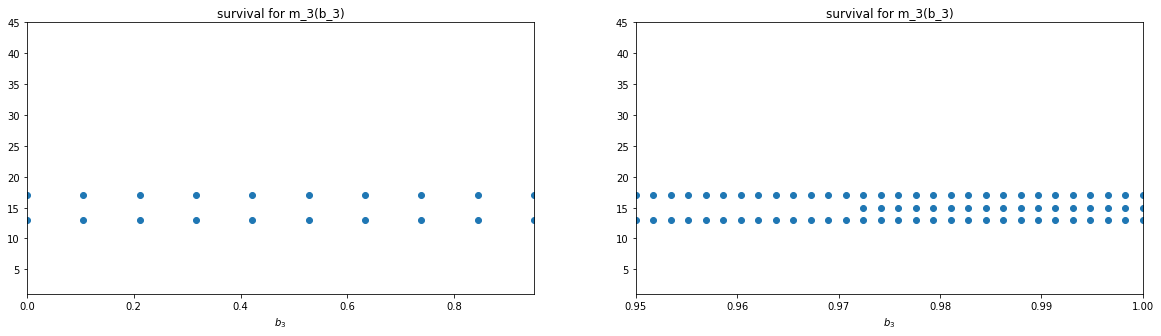

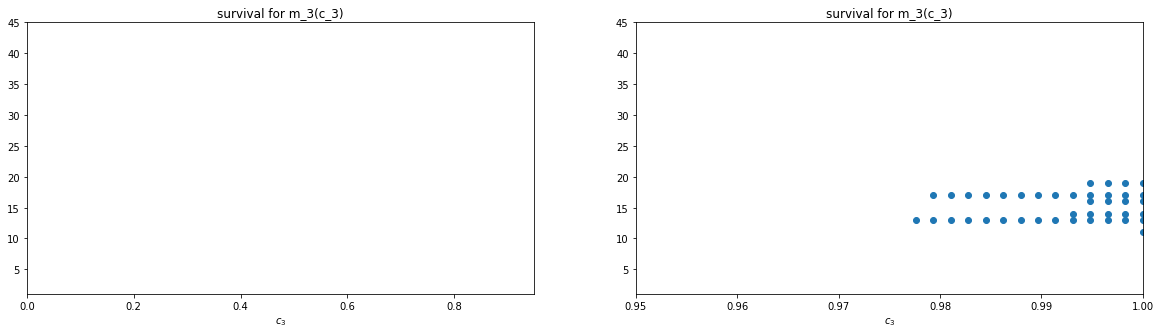

In [70]:
def test_predation_values(DEFAULT_PARAMS):
    
    for k in [2,3]:
        c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
        plt.figure(figsize=(20,5))
        for i, b_values in enumerate([np.linspace(0, 0.95, 10), np.linspace(0.95, 1, 30)]):
            plt.subplot(1,2,i+1)
            for b in b_values:
                survives = []
                cycling_predators = copy.deepcopy(cycling_predators)
                cycling_predators[k] = (b, cycling_predators[k][1])
                for p in range(1, 43):
                    model = Model1(p, c0, c1, r, cycling_predators, a0)
                    N = model.simulate(tmax)
                    if max(N[4*tmax//5:]) > 1: survives.append(p)

                plt.plot([b]*len(survives), survives, 'oC0')

            plt.xlim([b_values[0], b_values[-1]])
            plt.ylim([1,45])
            plt.xlabel(f'$b_{k}$')
            plt.title(f'survival for m_{k}(b_{k})')
    


        c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
        plt.figure(figsize=(20,5))    
        for i, c_values in enumerate([np.linspace(0, 0.95, 10), np.linspace(0.95, 1, 30)]):
            plt.subplot(1,2,i+1)
            for c in c_values:
                survives = []
                cycling_predators = copy.deepcopy(cycling_predators)
                cycling_predators[k] = (cycling_predators[k][0], c)
                for p in range(1, 43):
                    model = Model1(p, c0, c1, r, cycling_predators, a0)
                    N = model.simulate(tmax)
                    if max(N[4*tmax//5:]) > 1: survives.append(p)

                plt.plot([c]*len(survives), survives, 'oC0')

            plt.xlim([c_values[0], c_values[-1]])
            plt.ylim([1,45])
            plt.xlabel(f'$c_{k}$')
            plt.title(f'survival for m_{k}(c_{k})')
        
        
test_predation_values(DEFAULT_PARAMS)

### testing $f$

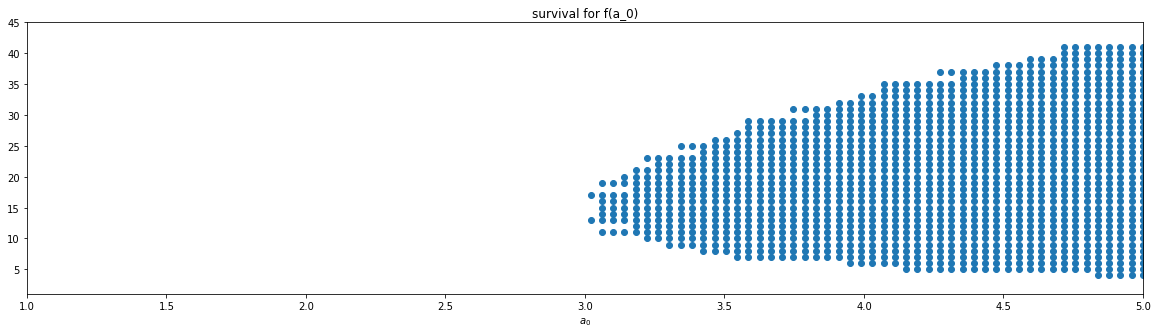

In [71]:
def test_f(DEFAULT_PARAMS):
    
    c0, c1, r, cycling_predators, a0 = DEFAULT_PARAMS.values()
    
    plt.figure(figsize=(20,5))

    a0_values = np.linspace(1, 5, 100)
    for a0 in a0_values:
        survives = []
        for p in range(1, 43):
            model = Model1(p, c0, c1, r, cycling_predators, a0)
            N = model.simulate(tmax)
            if max(N[4*tmax//5:]) > 1: survives.append(p)

        plt.plot([a0]*len(survives), survives, 'oC0')

    plt.xlim([a0_values[0], a0_values[-1]])
    plt.ylim([1,45])
    plt.xlabel('$a_0$')
    plt.title('survival for f(a_0)')
        
test_f(DEFAULT_PARAMS)